# **Primera entrega de TPs**
**Integrantes:** Brisa Antuña Bianchi, Sofía Escudero, Nael Pighin.


# **Librerías**

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


Activo mi entorno GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Guía 1:**

## **Ejercicio 3:**

Dimensiones:  (196, 285, 3)


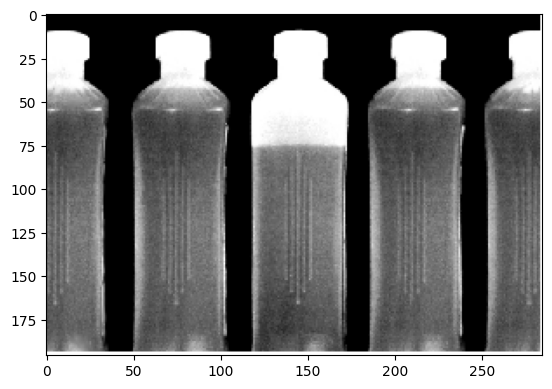

In [ ]:
im_normal = cv.imread("/content/drive/My Drive/PDI/botellas.tif")
im_grises = cv.imread("/content/drive/My Drive/PDI/botellas.tif", cv.IMREAD_GRAYSCALE)
print("Dimensiones: ", im_normal.shape)
plt.imshow(im_normal)
plt.show()

Valor máximo en escala de grises:  255
Valor mínimo en escala de grises:  0
Valor promedio en escala de grises:  92.35744718940208


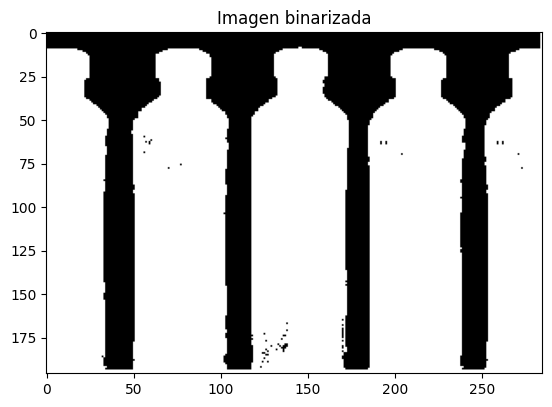

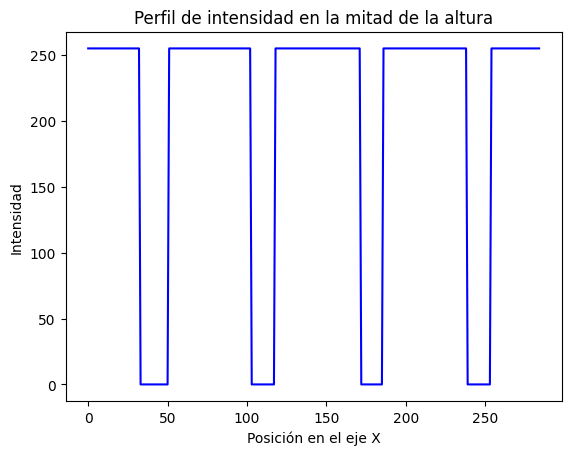

In [ ]:
# Data para conocer la imagen
max_grey = np.max(im_grises)
min_grey = np.min(im_grises)
avg_grey = np.mean(im_grises)
print("Valor máximo en escala de grises: ", max_grey)
print("Valor mínimo en escala de grises: ", min_grey)
print("Valor promedio en escala de grises: ", avg_grey)

# Umbral para binarizar la imagen
umbral = 50

# Hace negro cualquier pixel que esté por arriba del umbral y blanco si esta por debajo
im_binarizada = np.where(im_grises > umbral, 255, 0).astype(np.uint8)

plt.imshow(im_binarizada, cmap='gray')
plt.title("Imagen binarizada")
plt.show()

# Genera el perfil de intensidad en la mitad de la altura de la imagen
mitad_altura = im_binarizada.shape[0] // 2
perfil_intensidad = im_binarizada[mitad_altura, :]

# Graficar el perfil de intensidad
plt.plot(perfil_intensidad, color='blue')
plt.title("Perfil de intensidad en la mitad de la altura")
plt.xlabel("Posición en el eje X")
plt.ylabel("Intensidad")
plt.show()

In [ ]:
intervalos_botellas = []
inicio_is_set = False
inicio = -1

# Rellena el vector intervalo botellas con una serie de pares que indican donde
# empieza y donde termina una botella. En caso de que sólo se vieran pocos
# pixeles de la botella luego trata de sacar el centro entre estas 2 coordenadas
# lo cual en general no esta bueno
# debería ser un caso a tener en cuenta para corregir
for i in range(len(perfil_intensidad)):
    if perfil_intensidad[i] == 255 and inicio_is_set == False:
        inicio_is_set = True
        inicio = i
    elif perfil_intensidad[i] == 0 and inicio_is_set == True:
        intervalos_botellas.append([inicio, i-1])
        inicio_is_set = False
        inicio = -1

if inicio_is_set == True:
    intervalos_botellas.append([inicio, len(perfil_intensidad) - 1])
    print(intervalos_botellas)# Data para conocer un poco la imagen

[[0, 32], [51, 102], [118, 171], [186, 238], [254, 284]]


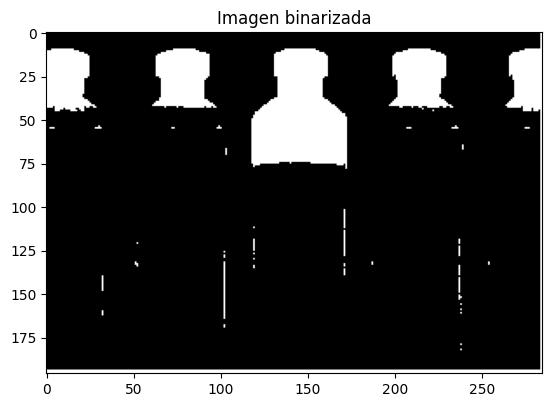

[44, 41, 73, 41, 42]


In [ ]:
# Definir el umbral para binarizar la imagen
umbral = 200
im_bin_nivel = np.where(im_grises > umbral, 255, 0).astype(np.uint8)

# Mostrar la imagen binarizada
plt.imshow(im_bin_nivel, cmap='gray')
plt.title("Imagen binarizada")
plt.show()

nivel_agua_botellas = []

for botella in intervalos_botellas:
    inicio = botella[0]
    fin = botella[1]
    centro = (inicio + fin) // 2

    nivel_agua = -1
    ceros_seguidos = 0 # Para asegurar que no sea algun pixel blanco medio random se cuentan 3 seguidos
    for i in range(im_bin_nivel.shape[0]):
       # print(im_bin_nivel.shape[0]-i-1, centro ,im_bin_nivel[im_bin_nivel.shape[0]-i-1][centro])
        if im_bin_nivel[im_bin_nivel.shape[0]-i-1][centro] == 255:  # Si encontramos un píxel negro
            ceros_seguidos += 1
        else:
            ceros_seguidos = 0
        if ceros_seguidos == 3:
            nivel_agua = im_bin_nivel.shape[0] - i  # Sumamos 2 para obtener el nivel en el píxel más bajo

    nivel_agua_botellas.append(nivel_agua)

print(nivel_agua_botellas)

In [ ]:
# Teniendo los niveles de cada botella a mano, armamos la salida para el problema.

nivel_max = 40  # aproximadamente en el nivel 40 de arriba para abajo se llenan las botellas
nivel_min = im_bin_nivel.shape[0] # 196

for i, nivel in enumerate(nivel_agua_botellas):
  porcentaje = (nivel - nivel_min)/(nivel_max - nivel_min)*100
  if(porcentaje < 95):  # umbral arbitrario para determinar si está llena o no
    print(f"La botella nº{i} no está llena. Nivel de llenado: {np.round(porcentaje,2)}%")
  else:
    print(f"La botella nº{i} está llena. Nivel de llenado: {np.round(porcentaje,2)}%")

La botella nº0 está llena. Nivel de llenado: 97.44%
La botella nº1 está llena. Nivel de llenado: 99.36%
La botella nº2 no está llena. Nivel de llenado: 78.85%
La botella nº3 está llena. Nivel de llenado: 99.36%
La botella nº4 está llena. Nivel de llenado: 98.72%


# **Guía 2:**

## **Ejercicio 4.2:**

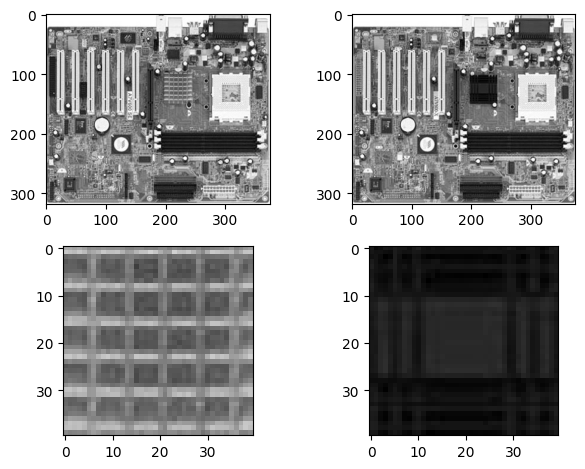

In [ ]:
# hay que pasar los .gif a .jpg o .png porque OpenCV no soporta .gif segun la página, volví a guardar las imágenes con estos formatos
se = cv.imread("/content/drive/My Drive/PDI/a7v600-SE.jpg",cv.IMREAD_GRAYSCALE)
x = cv.imread("/content/drive/My Drive/PDI/a7v600-X.jpg",cv.IMREAD_GRAYSCALE)

# Tras observar las imágenes, vemos que hay un componente en el medio que difiere mucho entre las dos placas
se_comp = se[105:145,200:240]
x_comp = x[105:145,200:240]

fig,ax = plt.subplots(2,2) # muestro imagenes de las placas y de los componentes que son distintos
ax[0,0].imshow(se,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(x,cmap='gray',vmin=0,vmax=255)
ax[1,0].imshow(se_comp,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(x_comp,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

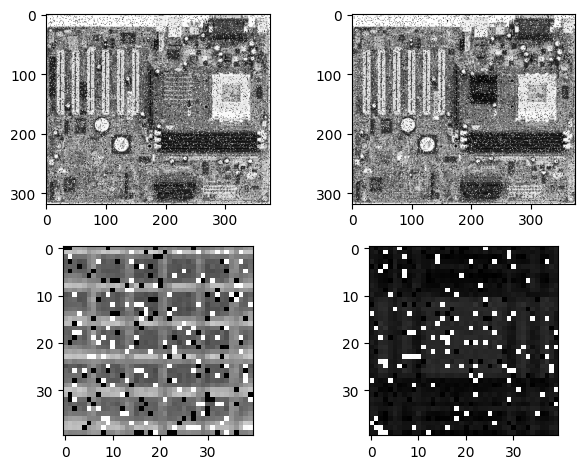

In [ ]:
# cargamos imagenes con ruido
se_ruido = cv.imread("/content/drive/My Drive/PDI/a7v600-SE(RImpulsivo).jpg",cv.IMREAD_GRAYSCALE)
x_ruido = cv.imread("/content/drive/My Drive/PDI/a7v600-X(RImpulsivo).jpg",cv.IMREAD_GRAYSCALE)

se_ruido_comp = se_ruido[105:145,200:240]
x_ruido_comp = x_ruido[105:145,200:240]

fig,ax = plt.subplots(2,2) # muestro imagenes de las placas con ruido y de los componentes que son distintos
ax[0,0].imshow(se_ruido,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(x_ruido,cmap='gray',vmin=0,vmax=255)
ax[1,0].imshow(se_ruido_comp,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(x_ruido_comp,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

In [ ]:
# Vemos que el componente de la placa SE es mucho más claro que el de la X. Esto se debería mantener sacando un promedio de los pixeles en el rango aún con ruido.
# obtengo las medias cada área limpia
mean_se = np.mean(se_comp)
mean_x = np.mean(x_comp)

# obtengo medias de las áreas con ruido para comparar con las limpias
mean_se_ruido = np.mean(se_ruido_comp)
mean_x_ruido = np.mean(x_ruido_comp)

print(f"SE con ruido tiene diferencia de {np.round(np.abs(mean_se - mean_se_ruido),2)} con SE y {np.round(np.abs(mean_x - mean_se_ruido),2)} con X")
print(f"X con ruido tiene diferencia de {np.round(np.abs(mean_se - mean_x_ruido),2)} con SE y {np.round(np.abs(mean_x - mean_x_ruido),2)} con X")

SE con ruido tiene diferencia de 1.5 con SE y 101.76 con X
X con ruido tiene diferencia de 86.34 con SE y 13.92 con X


In [ ]:
# Luego, con esto puedo pasarle una imagen y que me devuelva el tipo viendo la menor diferencia de medias entre la consulta y la referencia.
# Probamos con el SE con ruido.
dif_se = np.abs(mean_se - mean_se_ruido)
dif_x = np.abs(mean_x - mean_se_ruido)

if(dif_se < dif_x):  # si la media es más parecida al SE
  print("a7v600-SE") # devuelvo que es un SE
else:
  print("a7v600-X") # sino es un X

a7v600-SE


## **Ejercicio 4.3:**

3. En una fábrica de medicamentos se desea implementar un sistema para la
inspección visual automática de blisters en la línea de empaquetado. La adquisición de la imagen se realiza en escala de grises mediante una cámara
CCD fija y bajo condiciones controladas de iluminación, escala y enfoque. El
objetivo consiste en determinar en cada instante si el blister que está siendo
analizado se encuentra incompleto, en cuyo caso la región correspondiente a
la píldora faltante presenta una intensidad similar al fondo. Escriba una función que reciba como parámetro la imagen del blister a analizar y devuelva
un mensaje indicando si el mismo contiene o no la totalidad de las píldoras. En caso de estar incompleto, indique la posición (x,y) de las píldoras
faltantes. Verifique el funcionamiento con las imágenes blister completo.jpg y
blister incompleto.jpg.


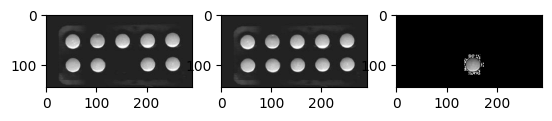

In [ ]:
# Cargo las imágenes
blister_incompleto = cv.imread('/content/drive/My Drive/PDI/blister_incompleto.jpg',cv.IMREAD_GRAYSCALE)
blister = cv.imread('/content/drive/My Drive/PDI/blister_completo.jpg',cv.IMREAD_GRAYSCALE)
blister_resta = blister[:,0:291] - blister_incompleto  # por alguna razón tienen tamaños distintos (144,292) y (144,291), por eso tomamos [:,0:291] de blister

# Visualizamos las imágenes para analizar el problema mejor
fig,ax = plt.subplots(1,3)
ax[0].imshow(blister_incompleto,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(blister,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(blister_resta,cmap="gray",vmin=0,vmax=255) # en la resta se ve donde está la diferencia entre los blisters
plt.show()

In [ ]:
# Analizando los plots, aproximadamente cada 50 posiciones de x y 50 posiciones de y tenemos el centro de una pastilla nueva.

# Ahora determinamos qué posición del blister ocupa esa parte de la resta con información.
for i in np.arange(5):  # para cada columna
    for j in np.arange(2):  # para cada fila
        if blister_incompleto[j*50+50,i*50+50]<80:   # j*50+50 para j = 0 es 50, para j = 1 es 100, para j = 2 es 150 y así sucesivamente. Lo mismo para i*50+50.
                                                      # Mientras no tome (aprox) más de 160 o menos de 35 de umbral funciona bien. Entre 35 y 150 debería andar, lo ponemos por el medio por robustez.
          print(f'Falta la pastilla en la columna {i+1}, fila {j+1}.')

Falta la pastilla en la columna 3, fila 2.


# **Guía 2.2:**

## **Ejercicio 2:**

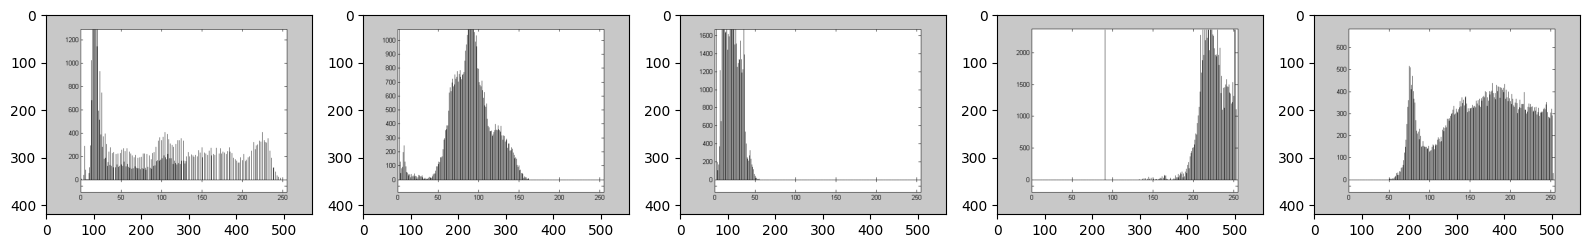

In [ ]:
histo1 = cv.imread("/content/drive/My Drive/PDI/histo1.tif",cv.IMREAD_GRAYSCALE)
histo2 = cv.imread("/content/drive/My Drive/PDI/histo2.tif",cv.IMREAD_GRAYSCALE)
histo3 = cv.imread("/content/drive/My Drive/PDI/histo3.tif",cv.IMREAD_GRAYSCALE)
histo4 = cv.imread("/content/drive/My Drive/PDI/histo4.tif",cv.IMREAD_GRAYSCALE)
histo5 = cv.imread("/content/drive/My Drive/PDI/histo5.tif",cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 5, figsize = (16,6))
ax[0].imshow(histo1,cmap='gray')
ax[1].imshow(histo2,cmap='gray')
ax[2].imshow(histo3,cmap='gray')
ax[3].imshow(histo4,cmap='gray')
ax[4].imshow(histo5,cmap='gray')
plt.tight_layout()
plt.show()

*   **histo1:** la imagen tiene muchos valores de gris distintos. Tiene más partes negras pero tiene casi todos los valores. Tiene buen contraste.
*   **histo2:** la imagen no es ni tan oscura ni tan clara, tiene grises y no tiene colores blancos. No tiene buen contraste.
*   **histo3:** la imagen es muy oscura, tiene color negros y grises oscuros. No tiene buen contraste.
*   **histo4:** la imágen es muy clarita, tiene color blanco y grises claros. No tiene buen contraste.
*   **histo4:** la imágen no tiene colores oscuros, tiene medios y claros. Tiene buen contraste.

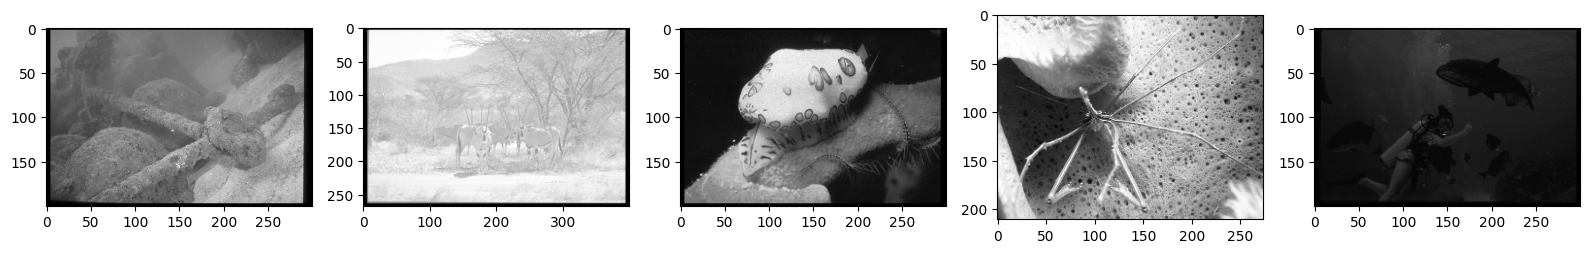

In [ ]:
imagenA = cv.imread("/content/drive/My Drive/PDI/imagenA.tif",cv.IMREAD_GRAYSCALE)
imagenB = cv.imread("/content/drive/My Drive/PDI/imagenB.tif",cv.IMREAD_GRAYSCALE)
imagenC = cv.imread("/content/drive/My Drive/PDI/imagenC.tif",cv.IMREAD_GRAYSCALE)
imagenD = cv.imread("/content/drive/My Drive/PDI/imagenD.tif",cv.IMREAD_GRAYSCALE)
imagenE = cv.imread("/content/drive/My Drive/PDI/imagenE.tif",cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 5, figsize = (16,6))
ax[0].imshow(imagenA,cmap='gray')
ax[1].imshow(imagenB,cmap='gray')
ax[2].imshow(imagenC,cmap='gray')
ax[3].imshow(imagenD,cmap='gray')
ax[4].imshow(imagenE,cmap='gray')
plt.tight_layout()
plt.show()

Deducimos qué histograma le corresponde a qué imágen:

*   **ImagenA:** Tiene mal contraste pero no tanto como las imágenes B y E, además de que tiene grises medios (ni tan oscuros, ni tan claros) luego lo asociamos con el histograma 2.
*   **ImagenB:** Tiene pésimo contraste y grises más que nada claritos, luego su histograma debería ser un pico a la derecha. Lo asociamos con el histograma 4.
*   **ImagenC:** Tiene muy buen contrate en comparación a las demás imágenes por lo que su histograma debe tener valores grises bien repartidos a lo largo del dominio. Luego, predecimos que su histograma es el 1 que tiene muchos valores de negro (el pico a la izquierda) que representaría el fondo negro de la imagen y el resto de grises está balanceado.
*   **ImagenD:** Tiene contraste decente, luego los grises deberían estar balanceados. No tiene mucho negro salvo por la partecita de la sombra abajo de la piedra, por lo que debería tener más valores de gris a la derecha. Lo asociamos con el histograma 5.
*   **ImagenE:** Tiene pésimo contraste y grises más que nada oscuros, luego su histograma debería ser un pico a la izquierda. Lo asociamos con el histograma 3.

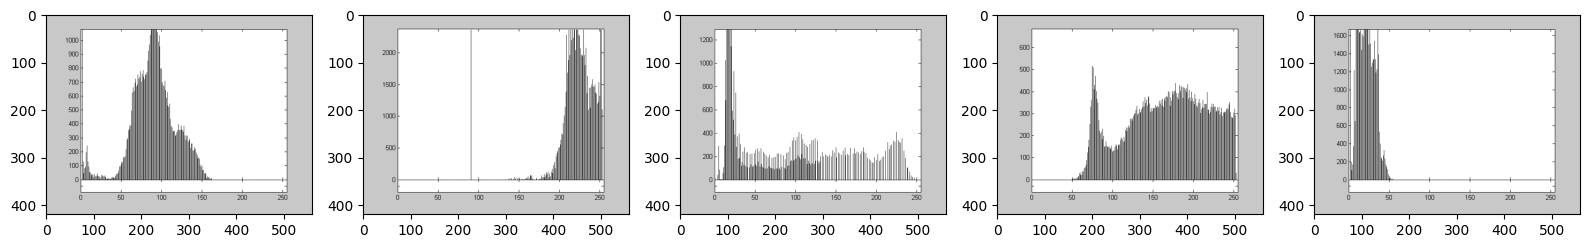

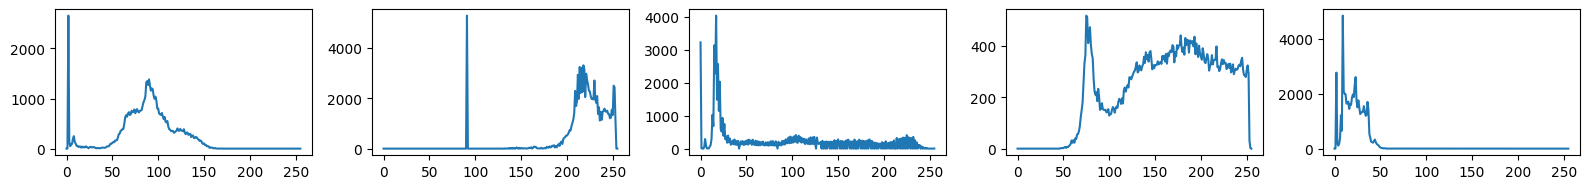

In [ ]:
histo_real_1 = cv.calcHist([imagenA], [0], None, [256], [0,256])
histo_real_2 = cv.calcHist([imagenB], [0], None, [256], [0,256])
histo_real_3 = cv.calcHist([imagenC], [0], None, [256], [0,256])
histo_real_4 = cv.calcHist([imagenD], [0], None, [256], [0,256])
histo_real_5 = cv.calcHist([imagenE], [0], None, [256], [0,256])

fig, ax = plt.subplots(1, 5, figsize = (16,6))  # Alineo plots de predicción y la real para comparar
ax[0].imshow(histo2,cmap='gray')  # predicción para imagen A
ax[1].imshow(histo4,cmap='gray')  # predicción para imagen B
ax[2].imshow(histo1,cmap='gray')  # ...
ax[3].imshow(histo5,cmap='gray')
ax[4].imshow(histo3,cmap='gray')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 5, figsize = (16,2))
ax[0].plot(histo_real_1) # histograma real para imagen A
ax[1].plot(histo_real_2) # histograma real para imagen B
ax[2].plot(histo_real_3) # ...
ax[3].plot(histo_real_4)
ax[4].plot(histo_real_5)
plt.tight_layout()
plt.show()

Obtenga y analice la utilidad de las siguientes propiedades estadísticas de los histogramas: media, varianza, asimetría, energía y entropía.


In [ ]:
def calcular_propiedades(h): # calculo todas las propiedades para un histograma
  histograma_norm = h.ravel()/h.sum()  # aplano el vector y normalizo

  media = np.sum(histograma_norm * np.arange(256))
  varianza = np.sum(histograma_norm * ((np.arange(256) - media) ** 2))
  asimetria = np.sum(histograma_norm * ((np.arange(256) - media) ** 3)) / (varianza ** (3/2))
  energia = np.sum(histograma_norm ** 2)
  entropia = -np.sum(histograma_norm * np.log2(histograma_norm + 1e-7)) # agrego 1e-7 para que no divida por 0
  return media, varianza, asimetria, energia, entropia

lista_histo = [histo_real_1,histo_real_2,histo_real_3,histo_real_4,histo_real_5]
resultados = {}

for i, n_histo in enumerate(lista_histo, start=1):  # paso todos los histogramas x la func y me guardo en un diccionario para mostrarlos dsps
    media, varianza, asimetria, energia, entropia = calcular_propiedades(n_histo)
    resultados[f'Imagen {i}'] = {
        'Media': media,
        'Varianza': varianza,
        'Asimetría': asimetria,
        'Energía': energia,
        'Entropía': entropia
    }

# los :<10 hacen espacios entre las palabras
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('Imagen', 'Media', 'Varianza', 'Asimetría', 'Energía', 'Entropía'))
for imagen, props in resultados.items():
    # los .2f me acortan el resultado a dos decimales (puedo poner 3,4,5,...)
    print("{:<10} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(imagen, props['Media'], props['Varianza'], props['Asimetría'], props['Energía'], props['Entropía']))

Imagen     Media      Varianza   Asimetría  Energía    Entropía  
Imagen 1   87.23      1010.37    -0.79      0.01       6.59      
Imagen 2   218.15     1089.35    -2.74      0.02       5.86      
Imagen 3   77.66      5079.12    0.79       0.02       6.74      
Imagen 4   165.94     2663.74    -0.24      0.01       7.51      
Imagen 5   20.88      114.58     0.34       0.03       5.20      


*   **Media:** Si las medias son parecidas entre los histogramas tienen valores centrales parecidos. Me dice en qué valor de gris se concentran en promedio los píxeles.
*   **Varianza:** Me dice la concentración de los datos alrededor de la media. Si es más baja, los valores de gris de los pixeles están cerquita de la media, sino lo contrario.
*   **Asimetría:** Si es positiva está sesgada a la izquierda (tiene más datos a la derecha de la media). Si es negativa está sesgada a la derecha (más datos a la izquierda de la media). Si es 0 es simétrica.
*   **Energía:** Valores más altos de energía pueden indicar una mayor concentración de datos en ciertas regiones del histograma.
*   **Entropía:** Si los valores de grises están bien distribuidos por la imagen (alto contraste) tienen más entropía porque hay más incerteza de que un pixel sea de cierto gris. Si los valores están concentrados en una zona entonces hay menor entropía porque tengo más certeza de que los valores de girs de los píxeles van a estar más que nada en esa zona concentrada.




# **Guia 3:**

## **Ejercicio 4.2:**

2. Aplique un filtro pasa-bajos de su elección y el filtro bilateral a las siguientes imágenes: mariposa02.png, flores02.jpg y lapices02.jpg (en escala de
grises). Compare los resultados y explique sus apreciaciones.

> **cv.bilateralFilter(img, d, sigmaColor, sigmaSpace)**
*   d: Diameter of each pixel neighborhood.
*   sigmaColor: The greater the value, the colors farther to each other will start to get mixed.
*   sigmaSpace: The greater its value, the more further pixels will mix together, given that their colors lie within the sigmaColor range.

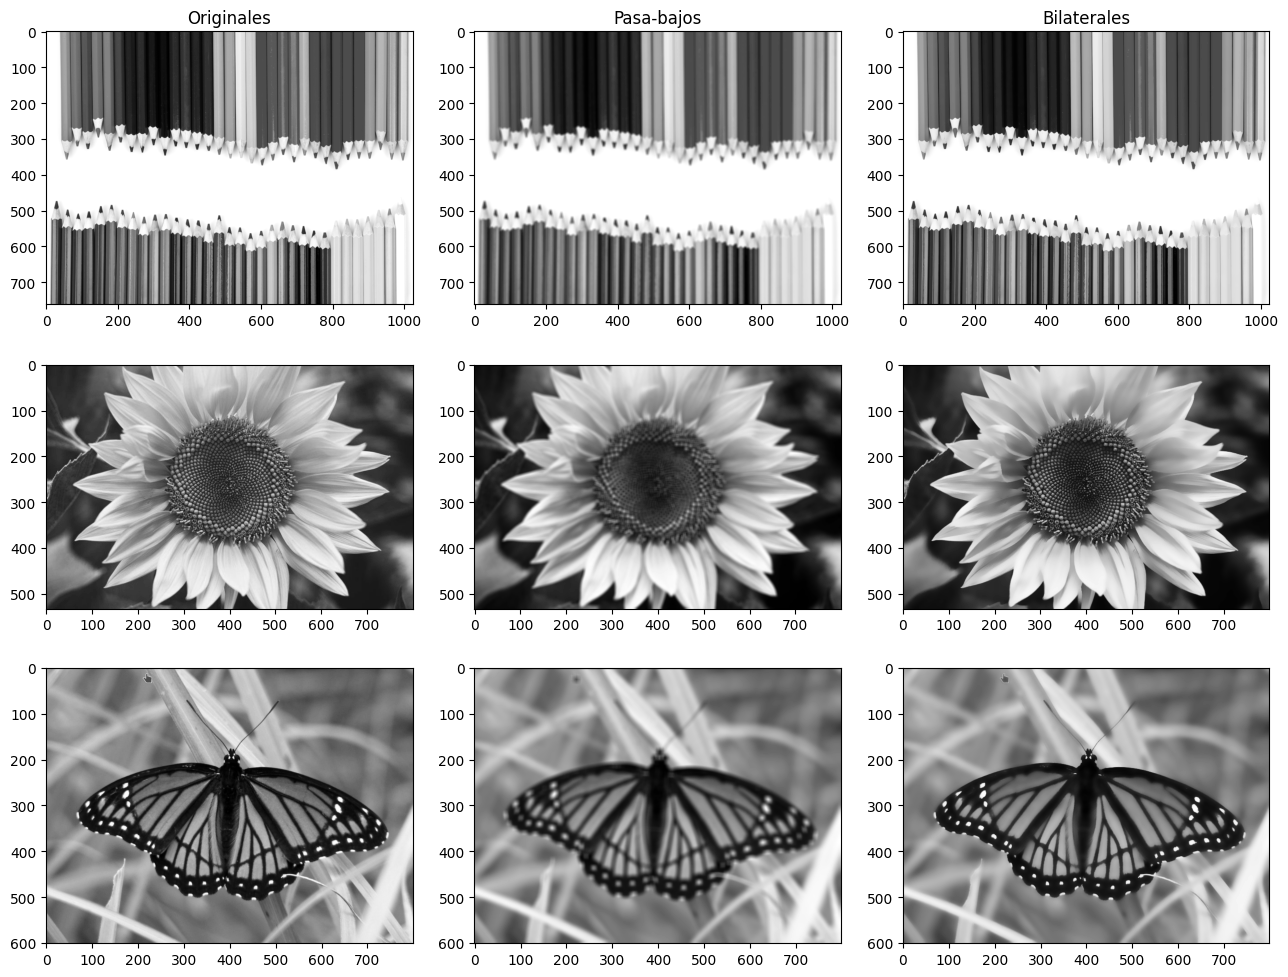

In [ ]:
# Cargamos las imágenes:
lapices02 = cv.imread("/content/drive/My Drive/PDI/lapices02.jpg", cv.IMREAD_GRAYSCALE)
flores02 = cv.imread("/content/drive/My Drive/PDI/flores02.jpg", cv.IMREAD_GRAYSCALE)
mariposa02 = cv.imread("/content/drive/My Drive/PDI/mariposa02.png", cv.IMREAD_GRAYSCALE)

# PASA-BAJOS:
lapices_PB = cv.boxFilter(lapices02, -1, (7,7))   # kernel va a depender de la imagen, vamos probando hasta que se vaya el ruido (viendo perfil del próximo inciso es más fácil ver si saqué bien el ruido que a ojo)
flores_PB = cv.boxFilter(flores02, -1, (7,7))
mariposa_PB = cv.boxFilter(mariposa02, -1, (11,11))

# BILATERAL:
lapices_BL = cv.bilateralFilter(lapices02, 15, 10, 10)  # jugamos con los parámetros para ver cómo va mejor, cambia
flores_BL = cv.bilateralFilter(flores02, 15, 15, 15)
mariposa_BL = cv.bilateralFilter(mariposa02, 15, 50, 50)

# Graficamos resultados:
fig,ax = plt.subplots(3,3,figsize=(13,10))

ax[0,0].set_title('Originales')
ax[0,1].set_title('Pasa-bajos')
ax[0,2].set_title('Bilaterales')

ax[0,0].imshow(lapices02,cmap='gray')
ax[0,1].imshow(lapices_PB,cmap='gray')
ax[0,2].imshow(lapices_BL,cmap='gray')

ax[1,0].imshow(flores02,cmap='gray')
ax[1,1].imshow(flores_PB,cmap='gray')
ax[1,2].imshow(flores_BL,cmap='gray')

ax[2,0].imshow(mariposa02,cmap='gray')
ax[2,1].imshow(mariposa_PB,cmap='gray')
ax[2,2].imshow(mariposa_BL,cmap='gray')

plt.tight_layout()
plt.show()

> Ambos filtros se encargan de reducir el ruido y suavizar la imágen, pero el bilateral puede mantener los bordes y los detalles finos mejor que un pasa-bajo. En el ejemplo de la mariposa es donde más lo podemos ver.

> Si elegimos un kernel muy grande para el pasa-bajo, saco más el ruido pero también suavizo más y pierdo bordes. Si es muy bajo, no suaviza y por ende no saca el ruido. Por ejemplo, si pongo (3,3) de kernel size, no está tan borroso pero tampoco le saqué el ruido (ver cuerpo de la mariposa).

> El bilateral va a poder deshacerse del ruido y suavizar sin perder tan fácilmente la definición de los bordes. Cuidado porque igualmente si le aumentamos mucho los parámetros vamos a ver que se empieza a ver borroso y pierde esa definición, y si los parámetros son muy chicos no estamos sacando el ruido porque no suaviza nada. Es pertinente elegir los parámetros adecuados para nuestra imágen.

Utilice la función implementada en la guía anterior para visualizar perfiles de grises, eligiendo la misma fila o columna para la imagen original y las que han sido filtradas. Compare los resultados visualizándolos simultáneamente.


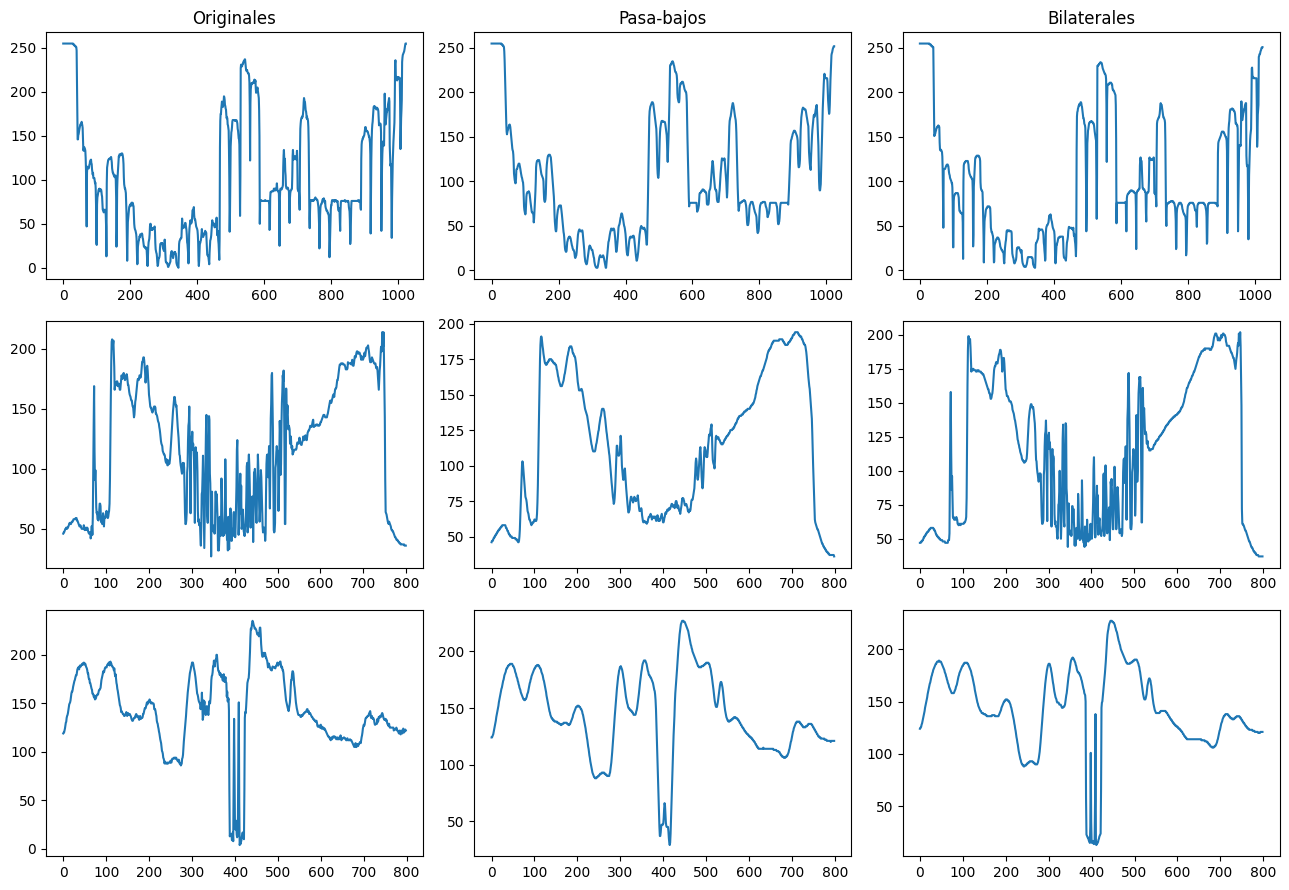

In [ ]:
# Obtengo perfiles:
fila = 200

perfil_lapices = lapices02[fila,:]
perfil_lapices_PB = lapices_PB[fila,:]
perfil_lapices_BL = lapices_BL[fila,:]

perfil_flores = flores02[fila,:]
perfil_flores_PB = flores_PB[fila,:]
perfil_flores_BL = flores_BL[fila,:]

perfil_mariposa = mariposa02[fila,:]
perfil_mariposa_PB = mariposa_PB[fila,:]
perfil_mariposa_BL = mariposa_BL[fila,:]

# Graficamos resultados:
fig,ax = plt.subplots(3,3,figsize=(13,9))

ax[0,0].set_title('Originales')
ax[0,1].set_title('Pasa-bajos')
ax[0,2].set_title('Bilaterales')

ax[0,0].plot(perfil_lapices)
ax[0,1].plot(perfil_lapices_PB)
ax[0,2].plot(perfil_lapices_BL)

ax[1,0].plot(perfil_flores)
ax[1,1].plot(perfil_flores_PB)
ax[1,2].plot(perfil_flores_BL)

ax[2,0].plot(perfil_mariposa)
ax[2,1].plot(perfil_mariposa_PB)
ax[2,2].plot(perfil_mariposa_BL)

plt.tight_layout()
plt.show()

> Observamos los perfiles de las imagenes en la fila x = 200.

> Para el caso de los lápices (fila 1) se ve más reducido el ruido (los artefactos más que nada en los picos del gráfico) en el filtrado bilateral.

> La flor (fila 2) muestra como el bilateral logra mantener la distribución de los distintos niveles de grises. Por otro lado, si miramos el pasabajo, si bien el ruido se ve disminuido por la falta de artefactos en la curva, por ejemplo, en y = 700, vemos que suavizó la transición de un valor de gris a otro. Esto en el bilateral no sucedió.

> Por último, en el caso de la mariposa (fila 3) vemos algo muy similar. En y = 400 vemos como el filtro pasa-bajos suavizó la transición de esos valores de grises, mientras que el bilateral mantuvo los picos que se observan en el perfil de la imagen original. En ambos, sin embargo, perdemos los artefactos de la curva para tener una más suave.

# **Guía 4:**

Para ambos ejercicios solicitados utilizamos las siguientes funciones que son para segmentación RGB y HSV. Con esto obtenemos automáticamente el valor máximo del histograma de la ROI en sus distintos canales, pero podría tratarse el problema analizando el histograma a mano para determinar el centro del círculo o del rectángulo. El radio se maneja por parámetros y podría ser útil implementar una barra deslizante para ver cómo varía el resultado con distintos valores de R, deltaS y deltaH.

In [ ]:
def segmentacion_rgb(img,roi,R):
    # obtenemos información de la roi para generar máscara
    BGR_roi = cv.split(roi)
    maxB = np.argmax(np.histogram(BGR_roi[0],np.arange(256))[0])  # obtenemos valor más frecuente de rojo
    maxG = np.argmax(np.histogram(BGR_roi[1],np.arange(256))[0])  # valor más frecuente de verde
    maxR = np.argmax(np.histogram(BGR_roi[2],np.arange(256))[0])  # valor más frecuente de azul

    # generar máscara:
    H,W,_ = img.shape
    maskBGR = np.zeros((H,W),np.uint8)

    for i in range(H):  # recorremos píxel a píxel
        for j in range(W):
            if ((maxB - img[i][j][0])**2 + (maxG - img[i][j][1])**2 + (maxR - img[i][j][2])**2) <= R**2: # si los valores de rojo, verde y azul del píxel i,j
                                                                                                         # tienen una distancia euclidea menor a R con los
                                                                                                         # valores más frecuentes de la ROI, me interesa.
                maskBGR[i][j]=255 # le pongo valor 255 a la máscara en ese píxel, si no entra acá ese píxel queda en 0 y va a descartarlo cunado aplique la máscara.
    return maskBGR

def segmentacion_hsv(img,roi,deltaH,deltaS):
    # obtenemos los canales de la imagen y de la ROI.
    HSV = cv.split(cv.cvtColor(roi, cv.COLOR_BGR2HSV))
    HSV_img = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))

    # buscamos pico del histograma (valor más frecuente) para los dos canales
    maxH = np.argmax(np.histogram(HSV[0],np.arange(256))[0])
    maxS = np.argmax(np.histogram(HSV[1],np.arange(256))[0])

    # generar máscara:
    H,W,_ = img.shape
    maskHSV = np.zeros((H,W),np.uint8)

    for i in np.arange(H):  # recorremos píxel a píxel
        for j in np.arange(W):
            # hacemos 1 en la máscara sólo a los píxeles cuyos valores de H y S están dentro del rectángulo definido por los límites:
            # (maxH - deltaH, maxH + deltaH) en una dimensión correspondiente al hue o tono
            # (maxS - deltaS, maxS + deltaS) en la otra dimensión correspondiente a la saturación
            if (HSV_img[0][i,j] >= maxH-deltaH) and (HSV_img[0][i,j] <= maxH+deltaH) and (HSV_img[1][i,j] >=maxS-deltaS) and (HSV_img[1][i,j] <=maxS+deltaS):
                maskHSV[i,j] = 255
    return maskHSV

## **Ejercicio 4:**

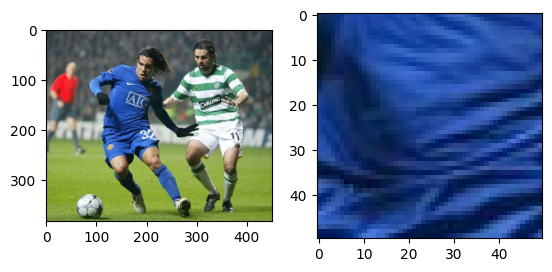

In [ ]:
futbol = cv.imread('/content/drive/My Drive/PDI/futbol.jpg')
roi = futbol[160:210,130:180] # tomo mi region de interés representativa que es la que tiene el color de la remera del jugador de la izquierda

fig, ax = plt.subplots(1,2)
ax[0].imshow(futbol[:,:,[2,1,0]])
ax[1].imshow(roi[:,:,[2,1,0]])
plt.show()

Para utilizar las funciones vamos variando los parámetros hasta conseguir un resultado deseable.

> En el caso de la segmentación RGB vamos variando hasta tomar la cantidad deseada de tonos azules. Un radio muy chico puede hacer que no tomemos todo el uniforme del jugador y un radio muy grande puede empezar a tomar otras partes de la imagen que no nos interesan. Es destacable notar que puede variar mucho entre un radio de 90 y un radio de 100.

En el caso de la segmentación HSV vamos analizando lo mismo pero con los dos rangos cambiando los delta, ya que ahora tenemos dos que me determinan la máscara.

> Si ponemos un deltaS muy chico toma las partes de azul más claritas y no tanto las oscuras, si ponemos un deltaS muy grande toma toda la silueta pero también los azules más grisaceos que se ven en la audiencia o en el short del árbitro.

> Si ponemos un deltaH muy chico puede no tomar todos los distintos tonos de azul del uniforme pero debe ser muy chico (deltaH = 1) para hacer un cambio notable. Si ponemos un deltaH muy grande empieza a captar otros colores como las rayas verde del uniforme del otro jugador, ya con deltaH = 30 lo empezamos a notar.


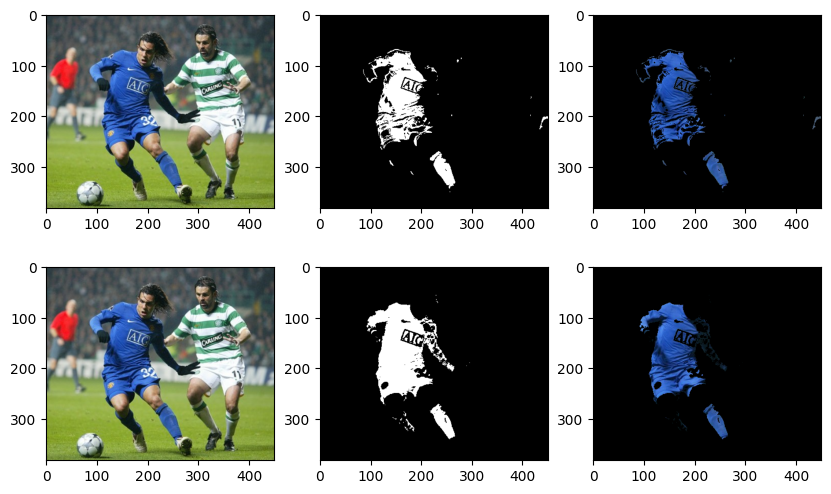

In [ ]:
# Segmentación RGB:
maskBGR = segmentacion_rgb(futbol,roi,R=93)
futbol_segm_bgr = cv.bitwise_and(futbol,futbol,mask=maskBGR)

# Segmentación HSV:
maskHSV = segmentacion_hsv(futbol,roi,deltaH=18,deltaS=105)
futbol_segm_hsv = cv.bitwise_and(futbol,futbol,mask=maskHSV)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
ax[0,0].imshow(futbol[:,:,[2,1,0]])
ax[0,1].imshow(maskBGR,cmap="gray",vmin=0,vmax=255)
ax[0,2].imshow(futbol_segm_bgr[:,:,[2,1,0]])
ax[1,0].imshow(futbol[:,:,[2,1,0]])
ax[1,1].imshow(maskHSV,cmap="gray",vmin=0,vmax=255)
ax[1,2].imshow(futbol_segm_hsv[:,:,[2,1,0]])
plt.show()

El resultado fue mucho mejor con la segmentación HSV ya que captó mejor el uniforme con la máscara, logrando obtener las partes más iluminadas y las más oscurecidas, y no tuvo tanto ruido como el RGB. También hay una dependencia en los resultados de qué ROI sacamos, pero el método por HSV también ofrece parámetros más ajustables, con más posibilidades de definir ajustes en base a otros criterios que no sean el color. Por último, notamos que al cambiar un poco la ROI (por ejemplo, en vez de [160:200,130:170] tomamos [160:190,130:160] el resultado de la segmentación RGB varía muchísimo, se rompe, mientras que la de HSV se mantiene casi igual sin reajustar los parámetros deltaS, deltaH.

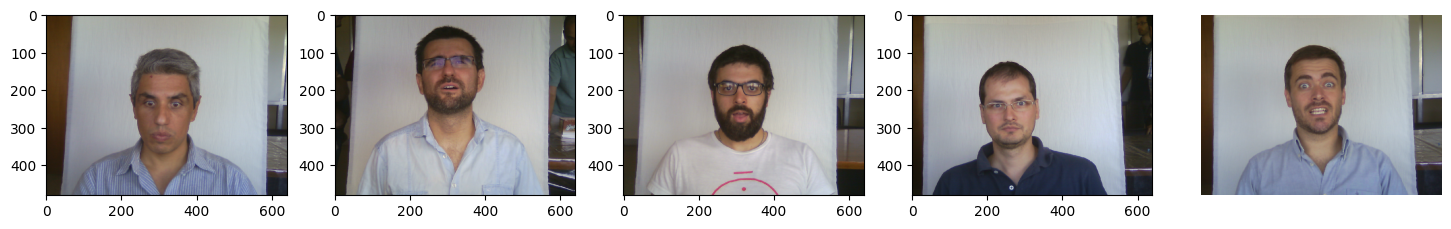

In [ ]:
cara1 = cv.imread('/content/drive/My Drive/PDI/s01_i08_H_CM.png')
cara2 = cv.imread('/content/drive/My Drive/PDI/s03_i10_H_DM.png')
cara3 = cv.imread('/content/drive/My Drive/PDI/s05_i08_H_LB.png')
cara4 = cv.imread('/content/drive/My Drive/PDI/s06_i13_H_LV.png')
cara5 = cv.imread('/content/drive/My Drive/PDI/s08_i06_H_MA.png')

fig,ax = plt.subplots(1,5,figsize=(18,18))
ax[0].imshow(cara1[:,:,[2,1,0]],vmin=0,vmax=255)
ax[1].imshow(cara2[:,:,[2,1,0]],vmin=0,vmax=255)
ax[2].imshow(cara3[:,:,[2,1,0]],vmin=0,vmax=255)
ax[3].imshow(cara4[:,:,[2,1,0]],vmin=0,vmax=255)
ax[4].imshow(cara5[:,:,[2,1,0]],vmin=0,vmax=255)
ax[4].axis('off')
plt.show()

Analizando las imágenes y los ejes, obtenemos las ROI para cada cara y aplicamos ambas segmentaciones para cada caso.

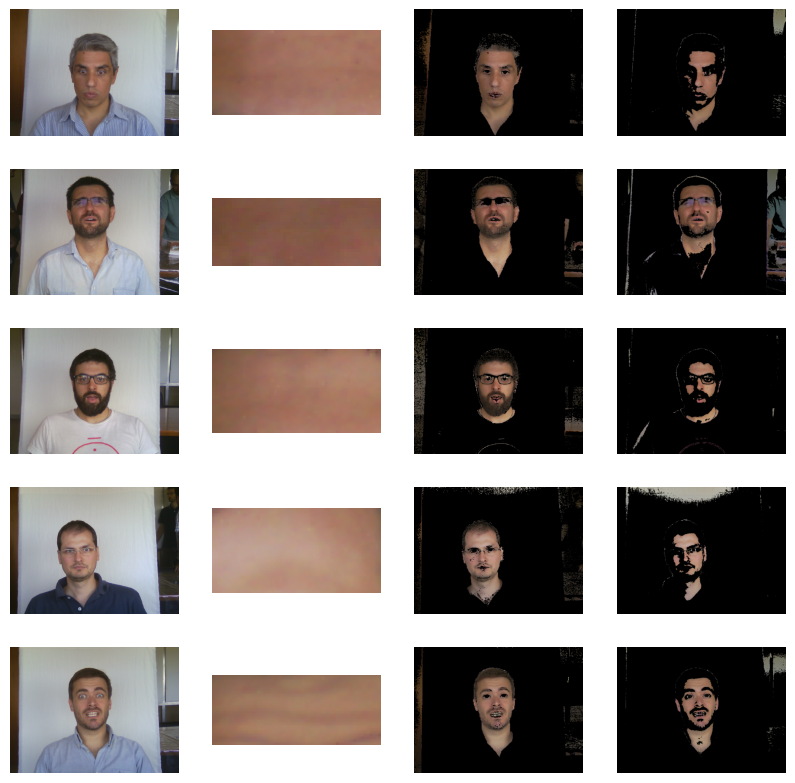

In [ ]:
roi_cara1 = cara1[180:210,270:330]
roi_cara2 = cara2[85:105,270:320]
roi_cara3 = cara3[140:170,270:330]
roi_cara4 = cara4[180:210,250:310]
roi_cara5 = cara5[125:150,270:330]

# Segmentación HSV:
segm_hsv_cara1 = cv.bitwise_and(cara1,cara1,mask=segmentacion_hsv(cara1,roi_cara1,12,70))
segm_hsv_cara2 = cv.bitwise_and(cara2,cara2,mask=segmentacion_hsv(cara2,roi_cara2,12,70))
segm_hsv_cara3 = cv.bitwise_and(cara3,cara3,mask=segmentacion_hsv(cara3,roi_cara3,12,70))
segm_hsv_cara4 = cv.bitwise_and(cara4,cara4,mask=segmentacion_hsv(cara4,roi_cara4,10,65))
segm_hsv_cara5 = cv.bitwise_and(cara5,cara5,mask=segmentacion_hsv(cara5,roi_cara5,12,70))

# Segmentación BGR:
segm_rgb_cara1 = cv.bitwise_and(cara1,cara1,mask=segmentacion_rgb(cara1,roi_cara1,50))
segm_rgb_cara2 = cv.bitwise_and(cara2,cara2,mask=segmentacion_rgb(cara2,roi_cara2,75))
segm_rgb_cara3 = cv.bitwise_and(cara3,cara3,mask=segmentacion_rgb(cara3,roi_cara3,50))
segm_rgb_cara4 = cv.bitwise_and(cara4,cara4,mask=segmentacion_rgb(cara4,roi_cara4,50))
segm_rgb_cara5 = cv.bitwise_and(cara5,cara5,mask=segmentacion_rgb(cara5,roi_cara5,50))

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(10,10))

ax[0,0].imshow(cara1[:,:,[2,1,0]])
ax[0,1].imshow(roi_cara1[:,:,[2,1,0]])
ax[0,2].imshow(segm_hsv_cara1[:,:,[2,1,0]])
ax[0,3].imshow(segm_rgb_cara1[:,:,[2,1,0]])

ax[1,0].imshow(cara2[:,:,[2,1,0]])
ax[1,1].imshow(roi_cara2[:,:,[2,1,0]])
ax[1,2].imshow(segm_hsv_cara2[:,:,[2,1,0]])
ax[1,3].imshow(segm_rgb_cara2[:,:,[2,1,0]])

ax[2,0].imshow(cara3[:,:,[2,1,0]])
ax[2,1].imshow(roi_cara3[:,:,[2,1,0]])
ax[2,2].imshow(segm_hsv_cara3[:,:,[2,1,0]])
ax[2,3].imshow(segm_rgb_cara3[:,:,[2,1,0]])

ax[3,0].imshow(cara4[:,:,[2,1,0]])
ax[3,1].imshow(roi_cara4[:,:,[2,1,0]])
ax[3,2].imshow(segm_hsv_cara4[:,:,[2,1,0]])
ax[3,3].imshow(segm_rgb_cara4[:,:,[2,1,0]])

ax[4,0].imshow(cara5[:,:,[2,1,0]])
ax[4,1].imshow(roi_cara5[:,:,[2,1,0]])
ax[4,2].imshow(segm_hsv_cara5[:,:,[2,1,0]])
ax[4,3].imshow(segm_rgb_cara5[:,:,[2,1,0]])

for i in range(5):
  for j in range(4):
    ax[i,j].axis('off')
plt.show()

> El método por HSV es más flexible en cuanto a las modificaciones que le podemos hacer para tomar ciertas cosas y otras no.

> No es posible obtener un conjunto de valores óptimo para todas las imágenes. Cada una tiene sus particularidades al tratarse de personas distintas. En general tienen valores similares pero necesitamos hacer ciertos retoques para arreglar algunas cosas. Por ejemplo:
- Para la cara2, el cuello y la cara tienen colores bastante distintos (el cuello es mucho más clarito), eso hace que en el RGB no se muestre tan fácilmente sin empezar a mostrar cosas del fondo. En el HSV esto se resuelve admitiendo un rango más amplio de valor. También se podría resolver aplicando dos segmentaciones tal vez.
- Para la cara4, ya que la persona tiene la piel más blanca que los demás, debemos hacer disminuir los deltas, ya que empieza a tomar la pared. Esto con el RGB no es tan fácil de corregir porque dejo de tomar la cara.

> Aplicar sin métodos de pre-procesamiento tiene un resultado decente pero seguramente sea mucho mejor utilizándolos.

> Los mayores inconvenientes están en la iluminación, que el fondo no es homogéneo y que se ven personas o cosas atrás en vez de ser todo blanco. Aunque se puede recortar hasta el área blanca, ese blanco no es homogéneo ya que se ven sombras y ciertos degradados que se evidencian porque la máscara, en ocasiones, toma ciertas partecitas de la pared correspondientes a esas sombras.

> - La distancia cámara-objeto, el foco y la ubicación son homogéneas entre las imágenes.
- Si bien la iluminación sería la misma, la distinta configuración de los objetos en la sala a la hora de tomar la foto hacen que aparezcan sombras distintas en la pared atrás del sujeto. La vestimenta, el color de piel, los accesorios son distintos entre las fotos. La pose es la misma pero los sujetos no están centrados en el mismo lugar. El fondo de la escena es distinto porque aparecen cosas diferentes a izquierda y derecha del área blanca, y no está centrado de la misma forma en todas las imágenes (ver imágen de cara4, parte blanca de la pared está muy distinta a las otras fotos).

> Lista de consideraciones útiles mínimas para base de datos de imágenes:
- Misma iluminación, que sea buena y constante a lo largo de la imágen.
- Sujetos centrados en una misma posición.
- Fondo homogéneo.
- Foto no borrosa.

## **Ejercicio 5.2:**

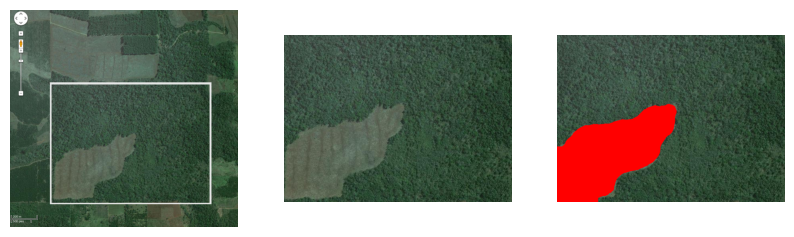

In [ ]:
bosque = cv.imread('/content/drive/My Drive/PDI/Deforestacion.png')
bosque_ROI = bosque[280:700,160:730]                          # Obtenemos sólo la parte a trabajar, la que está en el recuadro
bosque_blur = cv.boxFilter(bosque_ROI,-1,(39,39))             # Blur de la imágen original para sacar la máscara. Haciéndolo con la imágen borrosa evito sacar detalles innecesarios.
deforestado_ROI = bosque_ROI[330:400,40:100]                  # Saco una ROI de cómo se ve la parte deforestada

mascara_bosque = segmentacion_rgb(bosque_blur,deforestado_ROI,24)  # Máscara de la segmentacion de color correspondiente a deforestado_ROI

bgr_bosque = np.array(cv.split(bosque_ROI))                   # Saco los 3 canales del bosquecito
bgr_bosque[2][mascara_bosque != 0] = 255                      # Llevo el canal rojo a 255 para marcar la zona de deforestación (donde la máscara es distinta de 0)
bgr_bosque[1][mascara_bosque != 0] = 0                        # El resto de canales los seteo en 0
bgr_bosque[0][mascara_bosque != 0] = 0
bosque_rojo = cv.merge(bgr_bosque)                            # Obtengo mi imágen a partir de los tres planos R,G,B.

fig,ax = plt.subplots(1,3,figsize=(10,16))
ax[0].imshow(bosque[:,:,[2,1,0]])
ax[0].axis('off')
ax[1].imshow(bosque_ROI[:,:,[2,1,0]])
ax[1].axis('off')
ax[2].imshow(bosque_rojo[:,:,[2,1,0]])
ax[2].axis('off')
plt.show()

In [ ]:
H,W,_ = bosque_ROI.shape
area_total = H*W                                        # para el área total saco el área del rectángulo que saqué, ésto me da área en píxeles.
area_deforestada = np.count_nonzero(mascara_bosque)     # cuento los valores de la máscara distintos de 0 que representan sólo la parte roja
area_monte = area_total - area_deforestada              # para el área sin deforestar le resto al área total la parte que registra la máscara

print(f'Área total en píxeles: {area_total}')
print(f'Área deforestada en píxeles: {area_deforestada}')
print(f'Área monte en píxeles: {area_monte}')

Área total en píxeles: 239400
Área deforestada en píxeles: 43758
Área monte en píxeles: 195642


Como sabemos por la imágen de referencia que 100px -> 200m (esquina inferior izquierda), entonces en cada píxel tenemos 2m x 2m de área cubierta, o 4 metros cuadrados. Luego, hacemos una conversión para obtener el área en metros.

In [ ]:
area_total *= 4         # tenemos 239400 píxeles y cada uno representa 4 metros cuadrados, multiplico por 4 y me da el área en metros cuadrados.
area_deforestada *= 4
area_monte = area_total - area_deforestada

print(f'Área total en métros cuadrados: {area_total}')
print(f'Área deforestada en métros cuadrados {area_deforestada}')
print(f'Área monte en métros cuadrados: {area_monte}')

Área total en métros cuadrados: 957600
Área deforestada en métros cuadrados 175032
Área monte en métros cuadrados: 782568


Además, obtenemos el porcentaje de cubrimiento del área deforestada y del área del monte respecto del área total.

In [ ]:
porcentaje_deforestado = area_deforestada*100/area_total
porcentaje_monte = area_monte*100/area_total

print(f'Porcentaje deforestado: {np.round(porcentaje_deforestado,2)}%')
print(f'Porcentaje monte: {np.round(porcentaje_monte,2)}%')

Porcentaje deforestado: 18.28%
Porcentaje monte: 81.72%
